In [32]:
import sys
sys.path.append('../../')
from helpers.window import window_input_output

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Import data

In [34]:
df = pd.read_csv('../../datasets/Conventional.csv')
df.head()

,Date,Envi,Fuji,Gala
0,2015-01-04,117454,429518,5554
1,2015-01-11,110974,427723,5358
2,2015-01-18,151977,500684,4225
3,2015-01-25,140914,422435,4945
4,2015-02-01,217716,608156,5736


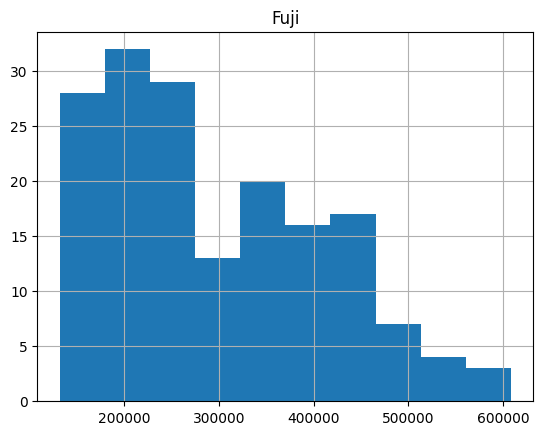

In [35]:
data = df[['Fuji']]
data.hist();

In [36]:
seq_df = window_input_output(14, 14, data)
seq_df

,Fuji,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,y_4,y_5,y_6,y_7,y_8,y_9,y_10,y_11,y_12,y_13
27,423853,428389.0,362226.0,405470.0,401133.0,439309.0,365471.0,369924.0,305201.0,454026.0,...,491584.0,487874.0,584094.0,404107.0,466313.0,608156.0,422435.0,500684.0,427723.0,429518.0
28,513055,423853.0,428389.0,362226.0,405470.0,401133.0,439309.0,365471.0,369924.0,305201.0,...,403061.0,491584.0,487874.0,584094.0,404107.0,466313.0,608156.0,422435.0,500684.0,427723.0
29,376355,513055.0,423853.0,428389.0,362226.0,405470.0,401133.0,439309.0,365471.0,369924.0,...,380285.0,403061.0,491584.0,487874.0,584094.0,404107.0,466313.0,608156.0,422435.0,500684.0
30,423520,376355.0,513055.0,423853.0,428389.0,362226.0,405470.0,401133.0,439309.0,365471.0,...,371990.0,380285.0,403061.0,491584.0,487874.0,584094.0,404107.0,466313.0,608156.0,422435.0
31,377129,423520.0,376355.0,513055.0,423853.0,428389.0,362226.0,405470.0,401133.0,439309.0,...,396450.0,371990.0,380285.0,403061.0,491584.0,487874.0,584094.0,404107.0,466313.0,608156.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,254658,197245.0,251175.0,468889.0,215803.0,233969.0,323916.0,292349.0,355322.0,171218.0,...,238206.0,158787.0,140122.0,249373.0,161436.0,156645.0,167203.0,165312.0,379023.0,324068.0
165,258653,254658.0,197245.0,251175.0,468889.0,215803.0,233969.0,323916.0,292349.0,355322.0,...,226577.0,238206.0,158787.0,140122.0,249373.0,161436.0,156645.0,167203.0,165312.0,379023.0
166,205340,258653.0,254658.0,197245.0,251175.0,468889.0,215803.0,233969.0,323916.0,292349.0,...,320968.0,226577.0,238206.0,158787.0,140122.0,249373.0,161436.0,156645.0,167203.0,165312.0
167,260748,205340.0,258653.0,254658.0,197245.0,251175.0,468889.0,215803.0,233969.0,323916.0,...,269918.0,320968.0,226577.0,238206.0,158787.0,140122.0,249373.0,161436.0,156645.0,167203.0


## Split data

In [37]:
X_cols = [col for col in seq_df.columns if col.startswith('x')]
X_cols.insert(0, 'Fuji')
y_cols = [col for col in seq_df.columns if col.startswith('y')]

X = seq_df[X_cols]
y = seq_df[y_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=123)

In [38]:
model = ElasticNet()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Score 

In [39]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Fuji):", mse)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (Fuji):", mae)

print("R-squared (Test score)", model.score(X_test, y_test))
print("Train score", model.score(X_train, y_train))

Mean Squared Error (Fuji): 8903716060.2655
Mean Absolute Error (Fuji): 80911.82887822717
R-squared (Test score) -0.9986255066080018
Train score 0.5610776611481828


## Visualization

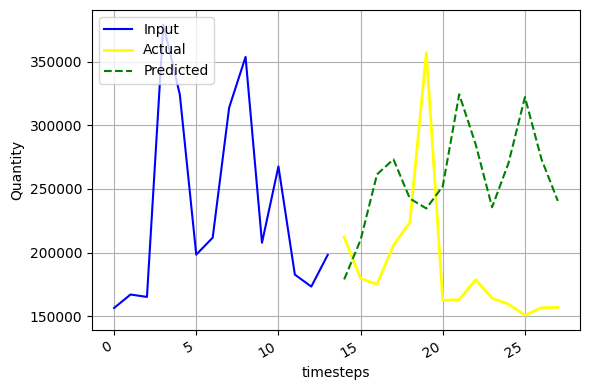

In [40]:
X_test_array = X_test.to_numpy()
y_test_array = y_test.to_numpy()

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(np.arange(0, 14, 1), X_test_array[1], 'b-', label='Input')
ax.plot(np.arange(14, 28, 1), y_test_array[1], color='yellow', label='Actual', linewidth=2)
ax.plot(np.arange(14, 28, 1), y_pred[1], color='green', label='Predicted', linestyle='--')

ax.set_xlabel('timesteps')
ax.set_ylabel('Quantity')
plt.grid(True)
plt.legend(loc=2)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

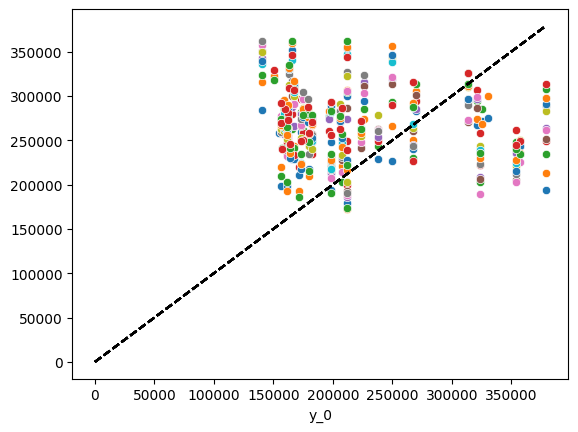

In [41]:
for i, col in enumerate(y_test.columns):
    sns.scatterplot(x=y_test[col], y=y_pred[:, i])

    max_val = max(y_test.max().max(), y_pred.max().max())
    plt.plot([0, max_val], [0, max_val], color='black', linestyle='--')